Wczytywanie danych w Python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#dane z pliku CSV do DataFrame
df = pd.read_csv(r"C:\Users\karol\OneDrive\Pulpit\zadanie\porownanie.csv", header=None, names=['segment_id', 'driver_id', 'segment_type', 'order_id', 'segment_start', 'segment_end','order_id_2', 'customer_id', 'sector_id','planned_delivery_duration'], sep=';')

# Wyświetl pierwsze kilka wierszy DataFrame
print(df.head())

   segment_id  driver_id segment_type  order_id                segment_start  \
0           0          4         STOP      1312  2024-02-09 14:58:42.0000000   
1           2          4         STOP      1273  2024-02-24 09:26:31.0000000   
2           4          1         STOP      1036  2024-02-24 20:26:23.0000000   
3           7          2         STOP      2178  2024-02-23 09:39:03.0000000   
4          10          4         STOP       331  2024-02-26 07:03:21.0000000   

                   segment_end  order_id_2  customer_id  sector_id  \
0  2024-02-09 15:01:56.0000000        1312          149          1   
1  2024-02-24 09:32:12.0000000        1273          228          3   
2  2024-02-24 20:26:23.0000000        1036          283          3   
3  2024-02-23 09:40:47.0000000        2178          234          3   
4  2024-02-26 07:06:16.0000000         331          272          3   

   planned_delivery_duration  
0                        175  
1                        177  
2    

In [3]:
#sprawdzanie poprawności eksportu danych 
rows_num = len(df)
print(rows_num)

2257


In [4]:
#nagłówek
df.head()

,segment_id,driver_id,segment_type,order_id,segment_start,segment_end,order_id_2,customer_id,sector_id,planned_delivery_duration
0,0,4,STOP,1312,2024-02-09 14:58:42.0000000,2024-02-09 15:01:56.0000000,1312,149,1,175
1,2,4,STOP,1273,2024-02-24 09:26:31.0000000,2024-02-24 09:32:12.0000000,1273,228,3,177
2,4,1,STOP,1036,2024-02-24 20:26:23.0000000,2024-02-24 20:26:23.0000000,1036,283,3,177
3,7,2,STOP,2178,2024-02-23 09:39:03.0000000,2024-02-23 09:40:47.0000000,2178,234,3,177
4,10,4,STOP,331,2024-02-26 07:03:21.0000000,2024-02-26 07:06:16.0000000,331,272,3,178


In [5]:
date1 = pd.to_datetime(df['segment_start'], format='%Y-%m-%d %H:%M:%S.%f')
date2 = pd.to_datetime(df['segment_end'], format='%Y-%m-%d %H:%M:%S.%f')
difference_seconds = (date2 - date1).dt.total_seconds()

# Wyświetlenie wyniku
print("Różnica w sekundach:", difference_seconds)


Różnica w sekundach: 0       194.0
1       341.0
2         0.0
3       104.0
4       175.0
        ...  
2252    249.0
2253    137.0
2254    547.0
2255    280.0
2256    119.0
Length: 2257, dtype: float64


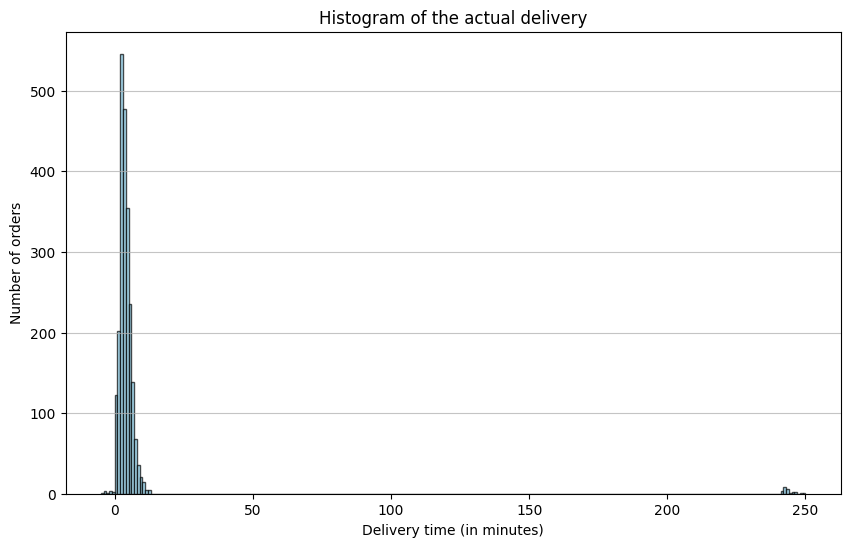

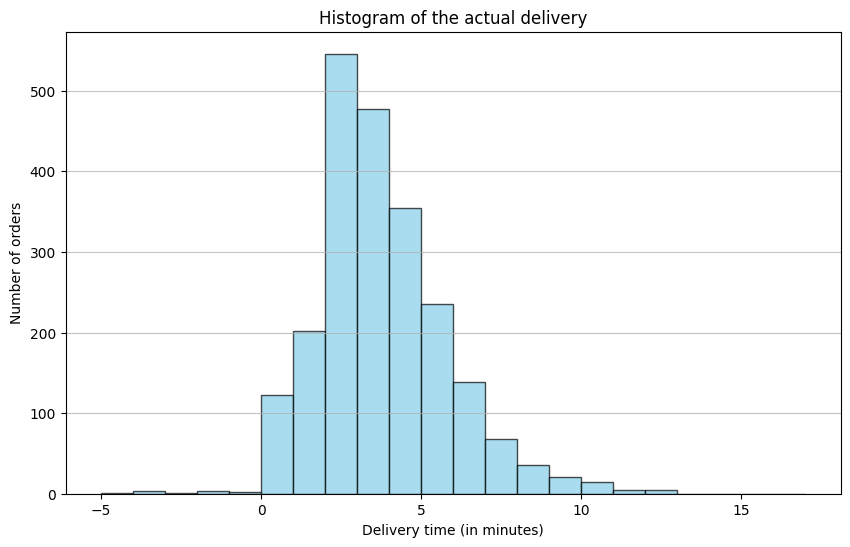

In [6]:
# delivery length with 1 minute granularity(rounded up)
delivery_length_minutes = np.ceil(difference_seconds / 60)

#histogram
plt.figure(figsize=(10, 6))
plt.hist(delivery_length_minutes, bins=np.arange(min(delivery_length_minutes), max(delivery_length_minutes) + 1, 1), color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of the actual delivery')
plt.xlabel('Delivery time (in minutes)')
plt.ylabel('Number of orders')
plt.grid(axis='y', alpha=0.75)
plt.show()

#histogram bez obserwacji odstających
plt.figure(figsize=(10, 6))
plt.hist(delivery_length_minutes, bins=np.arange(min(delivery_length_minutes), np.mean(delivery_length_minutes) *3, 1), color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of the actual delivery')
plt.xlabel('Delivery time (in minutes)')
plt.ylabel('Number of orders')
plt.grid(axis='y', alpha=0.75)
plt.show()



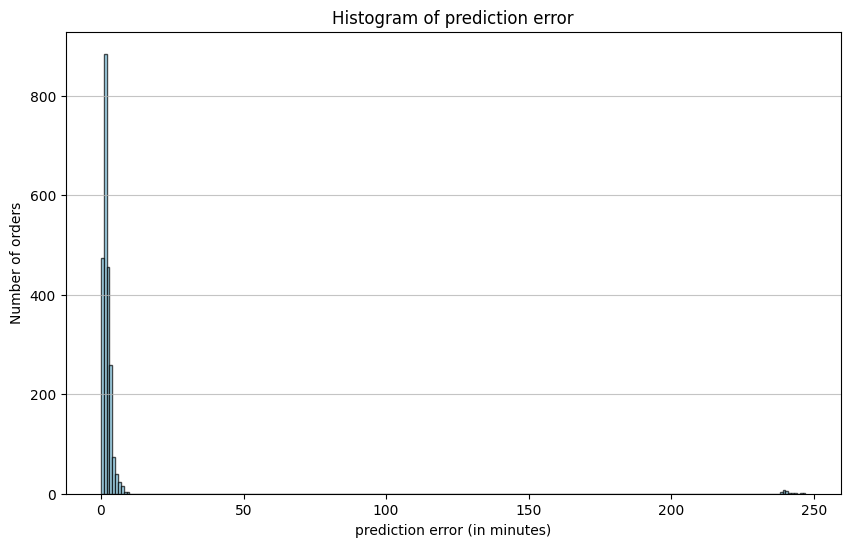

In [9]:
# prediction error in minutes 

prediction_error_m = abs(delivery_length_minutes - np.ceil(df['planned_delivery_duration']/60))
# Tworzenie histogramu błędu predykcji
plt.figure(figsize=(10, 6))
plt.hist(prediction_error_m, bins=np.arange(min(prediction_error_m), max(prediction_error_m) + 1, 1), color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of prediction error')
plt.xlabel('prediction error (in minutes)')
plt.ylabel('Number of orders')
plt.grid(axis='y', alpha=0.75)
plt.show()

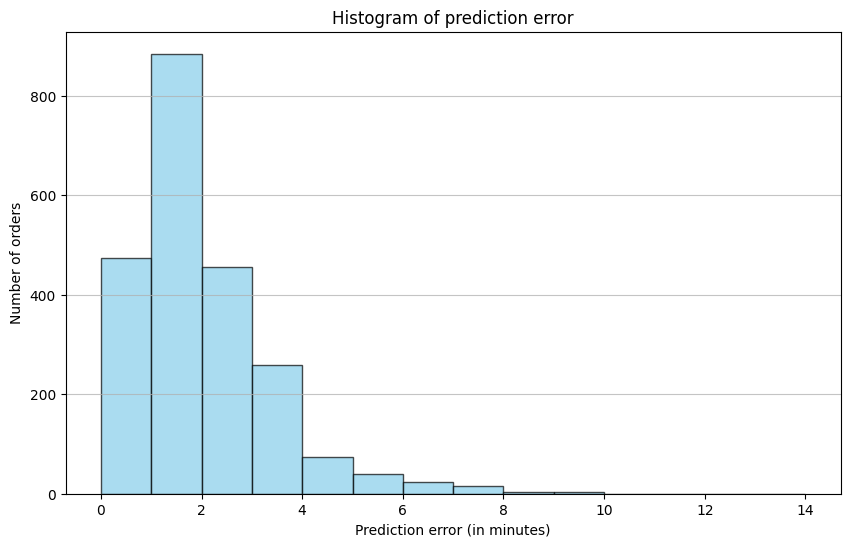

In [10]:
# prediction error in minutes 

prediction_error_m = abs(delivery_length_minutes - np.ceil(df['planned_delivery_duration']/60))
plt.figure(figsize=(10, 6))
plt.hist(prediction_error_m, bins=np.arange(min(prediction_error_m),15, 1), color='skyblue', edgecolor='black', alpha=0.7)

# Dodanie etykiet i tytułu
plt.title('Histogram of prediction error')
plt.xlabel('Prediction error (in minutes)')
plt.ylabel('Number of orders')

# Wyświetlenie histogramu
plt.grid(axis='y', alpha=0.75)
plt.show()

In [11]:
# Dodaj kolumnę z czasem dostawy w minutach do DataFrame
df['delivery_length'] = difference_seconds
# Obliczanie średniego czasu dostawy dla każdego idsektora
average_delivery_time_by_sector = df.groupby('sector_id')['delivery_length'].mean()
# Wyświetlenie wyników
print(round(average_delivery_time_by_sector))



sector_id
1    340.0
2    317.0
3    309.0
Name: delivery_length, dtype: float64


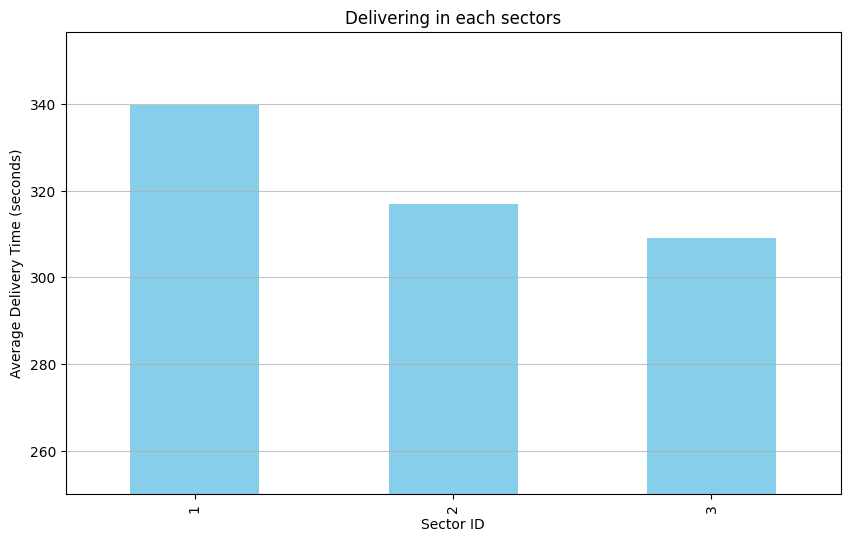

In [12]:
# Tworzenie wykresu słupkowego
average_delivery_time_by_sector = df.groupby('sector_id')['delivery_length'].mean()
plt.figure(figsize=(10, 6))
average_delivery_time_by_sector.plot(kind='bar', color='skyblue')
plt.ylim(250, plt.ylim()[1])
plt.title('Delivering in each sectors')
plt.xlabel('Sector ID')
plt.ylabel('Average Delivery Time (seconds)')
plt.grid(axis='y', alpha=0.75)
plt.show()



driver_id
1    216.0
2    323.0
3    298.0
4    455.0
Name: delivery_length, dtype: float64


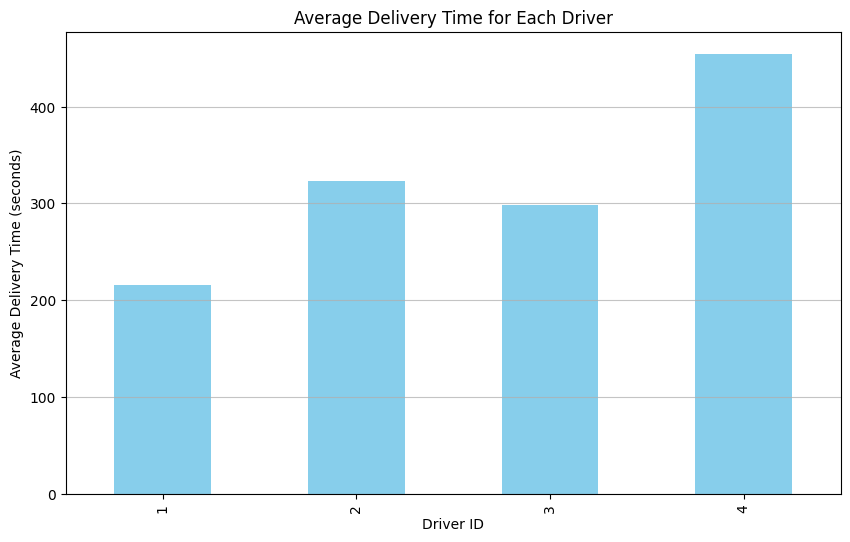

In [13]:
# w podziale na kierowców
average_delivery_time_by_driver = df.groupby('driver_id')['delivery_length'].mean()
print(round(average_delivery_time_by_driver))
plt.figure(figsize=(10, 6))
average_delivery_time_by_driver.plot(kind='bar', color='skyblue')
plt.title('Average Delivery Time for Each Driver')
plt.xlabel('Driver ID')
plt.ylabel('Average Delivery Time (seconds)')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [15]:
#dane z pliku CSV do DataFrame
df2 = pd.read_csv(r"C:\Users\karol\OneDrive\Pulpit\zadanie\analiza.csv", header=None, names=['segment_id', 'driver_id', 'segment_type', 'segment_start', 'segment_end', 'order_id', 'product_id', 'quantity','weight'], sep=';')
df2['delivery_length'] = difference_seconds
df2['total_weight'] = df2['quantity']*df2['weight']
df2['delivery_length_minutes']=delivery_length_minutes
# Wyświetl pierwsze kilka wierszy DataFrame
print(df2.head())

   segment_id  driver_id segment_type                segment_start  \
0        2738          3         STOP  2024-02-04 08:34:03.0000000   
1        2738          3         STOP  2024-02-04 08:34:03.0000000   
2        2738          3         STOP  2024-02-04 08:34:03.0000000   
3        2751          1         STOP  2024-02-02 08:47:30.0000000   
4        1137          3         STOP  2024-02-15 07:11:54.0000000   

                   segment_end  order_id  product_id  quantity  weight  \
0  2024-02-04 08:39:12.0000000         0           5         2    1993   
1  2024-02-04 08:39:12.0000000         0          70         2    1066   
2  2024-02-04 08:39:12.0000000         0          84         1    1675   
3  2024-02-02 08:48:39.0000000         1          20         3    1974   
4  2024-02-15 07:15:15.0000000         2          17         3    1612   

   delivery_length  total_weight  delivery_length_minutes  
0            194.0          3986                      4.0  
1            3

   order_id  quantity of products  total_weight  delivery_time_insec
0         0                     5          7793                  309
1         1                     3          5922                   69
2         2                     5          7742                  201
3         3                    12         18274                   92
4         4                    13         10208                   81


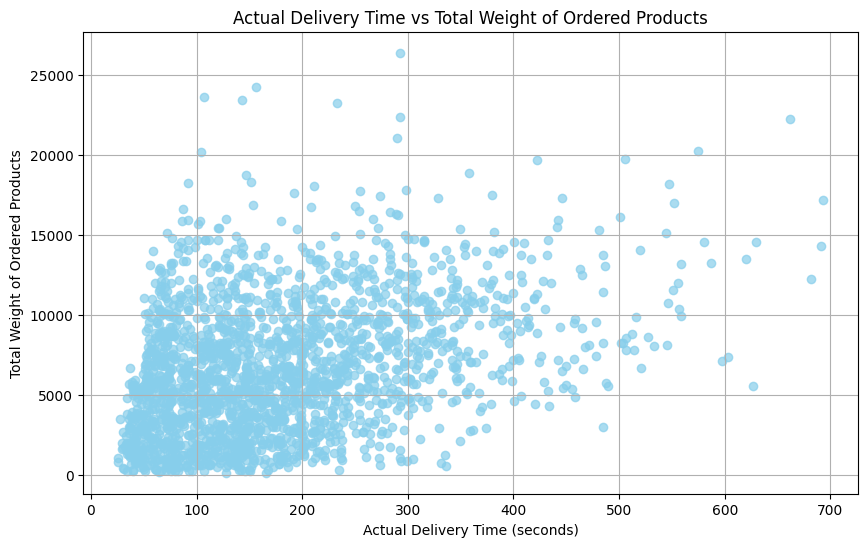

Correlation between total_weight and delivery_time_insec: 0.37439779840524756


In [28]:
df3 = pd.read_csv(r"C:\Users\karol\OneDrive\Pulpit\zadanie\weight.csv", header=None,   names=['order_id', 'quantity of products''total_weight', 'delivery_time_insec'],  sep=';')
# Filter
filtered_df3 = df3[(df3['delivery_time_insec'] > 0) & (df3['delivery_time_insec'] < 1500)]
print(df3.head())

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df3['delivery_time_insec'], filtered_df3['total_weight'], color='skyblue', alpha=0.7)
plt.title('Actual Delivery Time vs Total Weight of Ordered Products')
plt.xlabel('Actual Delivery Time (seconds)')
plt.ylabel('Total Weight of Ordered Products')

# Display the plot
plt.grid(True)
plt.show()

# Calculate correlation between the two variables
correlation = filtered_df3['total_weight'].corr(filtered_df3['delivery_time_insec'])
print("Correlation between total_weight and delivery_time_insec:", correlation)


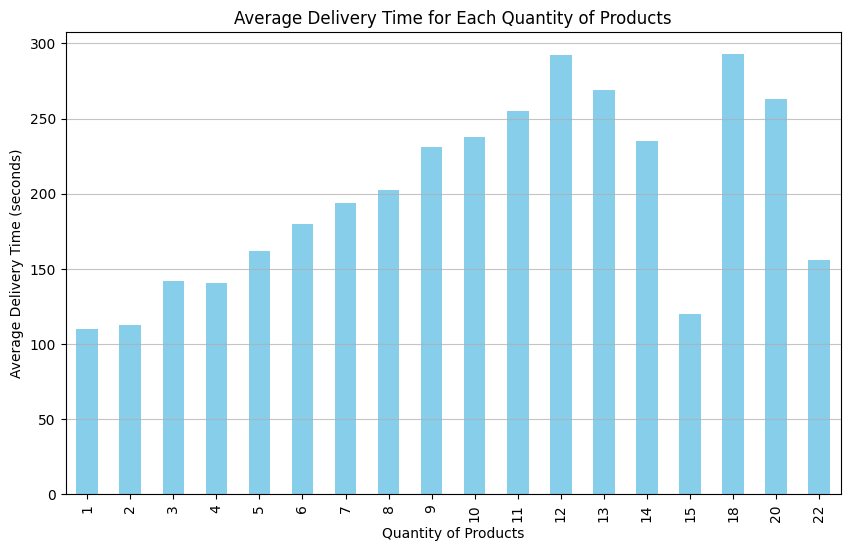

In [32]:
# Group the data by the quantity of products and calculate the average delivery time for each group
average_delivery_time_by_quantity = filtered_df3.groupby('quantity of products')['delivery_time_insec'].mean()

plt.figure(figsize=(10, 6))
average_delivery_time_by_quantity.plot(kind='bar', color='skyblue')
plt.title('Average Delivery Time for Each Quantity of Products')
plt.xlabel('Quantity of Products')
plt.ylabel('Average Delivery Time (seconds)')
plt.grid(axis='y', alpha=0.75)
plt.show()